In [1]:
from read_data import read_filtered_dataset
import pandas as pd

In [2]:
df = read_filtered_dataset()

In [7]:
df_numeric = df.drop(['ID', 'Precision', 'PrecioM2', 'CodigoPostal', 'NPRO', 'NMUN', 'CUDIS', 'NCA'], axis=1).copy()
categorical_cols = ['Caracteristicas', 'clasificacion_rural']
df_numeric = pd.get_dummies(df_numeric, columns=categorical_cols)

df_numeric = df_numeric.dropna()

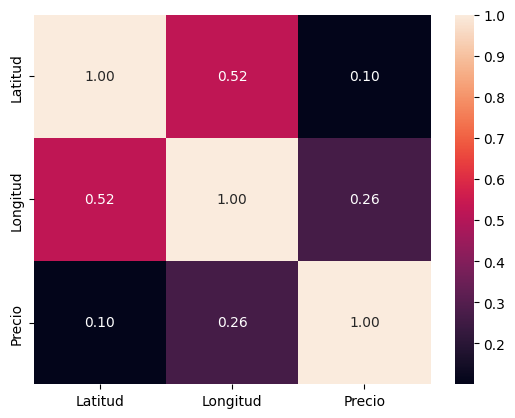

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[["Latitud", "Longitud", "Precio"]].corr()

svm =sns.heatmap(corr_matrix, annot=True, fmt='.2f')

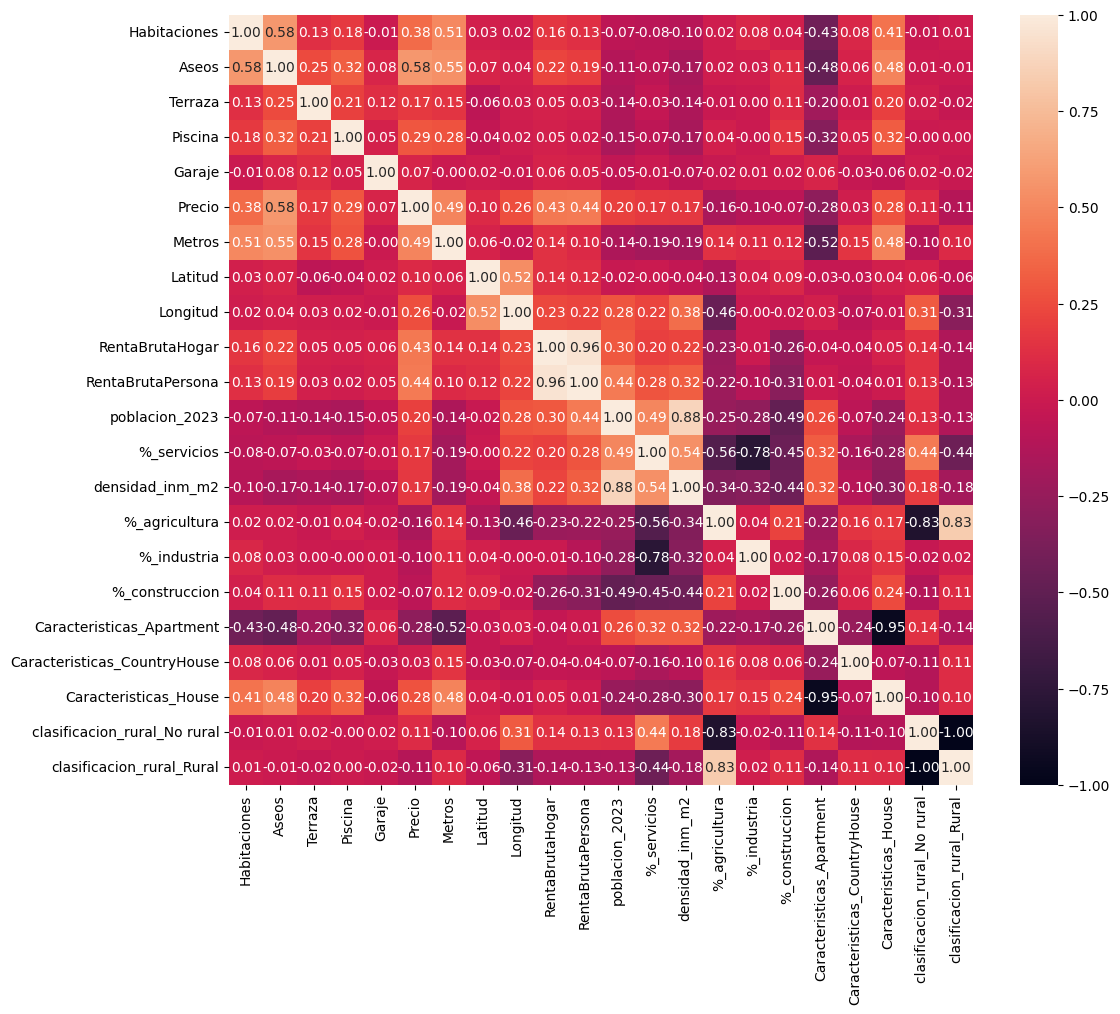

In [8]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10)) 
svm =sns.heatmap(corr_matrix, annot=True, fmt='.2f')

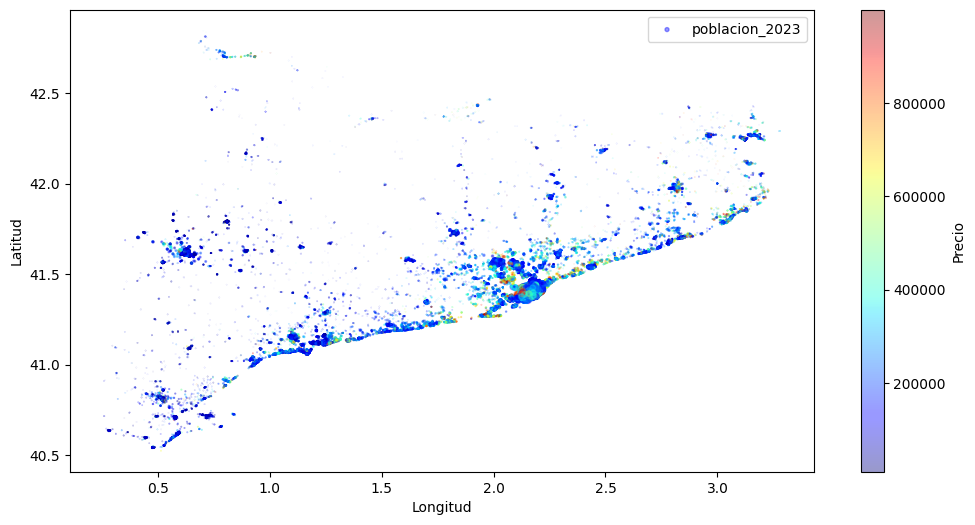

In [9]:
df_plot = df_numeric[df_numeric["Precio"]<1000000]
df_plot.plot(kind='scatter', x = 'Longitud', y = 'Latitud', alpha = 0.4,
              s = df_plot['poblacion_2023']/100000, label = 'poblacion_2023', figsize = (12, 6),
              c = 'Precio',
              cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show();

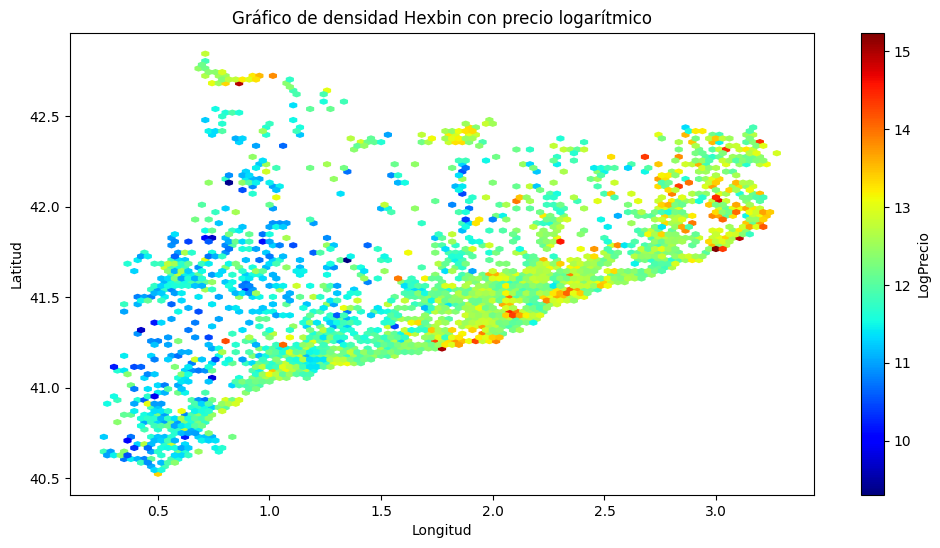

In [30]:
import numpy as np
import matplotlib.pyplot as plt

df['LogPrecio'] = np.log(df['Precio'])

plt.figure(figsize=(12, 6))
hb = plt.hexbin(
    df['Longitud'],
    df['Latitud'],
    C=df['LogPrecio'],
    gridsize=100,  
    reduce_C_function=np.mean,  
    cmap='jet'
)

cb = plt.colorbar(hb)
cb.set_label('LogPrecio')

plt.title('Gráfico de densidad Hexbin con precio logarítmico')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [1]:
from read_data import read_enhanced_microscore_dataset

df_microscore = read_enhanced_microscore_dataset()

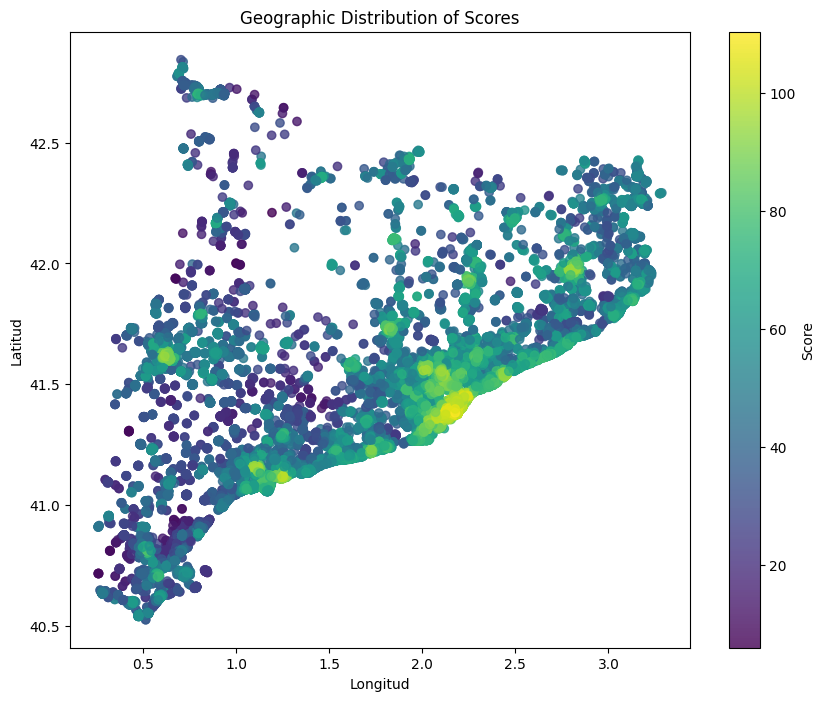

In [3]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df_microscore["Longitud"], 
    df_microscore["Latitud"], 
    c=df_microscore["Score"],  
    cmap="viridis", 
    alpha=0.8     
)

cbar = plt.colorbar(scatter)
cbar.set_label("Score")

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribucion geografica puntuacion")

plt.show()
